# **671 Project Code**
### **Alex Thompson**

# Data Pre-Processing

## Imports

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats
import seaborn as sns
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
from statsmodels.formula.api import ols

This cell imports various Python libraries and modules necessary for data manipulation, visualization, and analysis. These include pandas for data handling, matplotlib.pyplot and seaborn for data visualization, numpy for numerical operations, StandardScaler from sklearn.preprocessing for feature scaling, scipy.stats for statistical functions, and statsmodels for statistical modeling.

## Excel Files

In [2]:
district = pd.read_excel('DistrictCostDatabase_2023.xlsx', sheet_name='Data')
state = pd.read_excel('StateIndicatorsDatabase_2023.xlsx', sheet_name='Data')

C:\Users\alext\AppData\Local\Programs\Python\Python311\Lib\site-packages\openpyxl\worksheet\_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)
C:\Users\alext\AppData\Local\Programs\Python\Python311\Lib\site-packages\openpyxl\worksheet\_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


This cell loads data into pandas DataFrames from Excel files. Two different datasets are loaded: one named district from a file called 'DistrictCostDatabase_2023.xlsx', and another named state from 'StateIndicatorsDatabase_2023.xlsx'. Both use a sheet named 'Data'.

## "district" columns

| **Column**   | Description |
|--------------|-------------|
| **year**     | Year of data (year is the spring semester of the school year—e.g., 2019 is 2018-19) |
| **leaid**    | NCES district identification number |
| **district** | District name |
| **state_name** | State |
| **stabbr**   | State two-letter abbreviation |
| **ppcstot**  | Actual spending per-pupil |
| **predcost** | Required (adequate) spending per-pupil |
| **fundinggap** | Gap between actual and required spending per-pupil |
| **outcomegap** | Gap between district and U.S. average test scores (s.d.) |
| **enroll**   | Total student enrollment |
| **pov**      | Census child (5-17 year old) poverty rate |
| **iep**      | Percent special education students |
| **ell**      | Percent English language learners |
| **amind**    | Percent American Indian/Alaska Native students |
| **asian**    | Percent Asian students |
| **black**    | Percent Black students |
| **hisp**     | Percent Hispanic students |
| **multi**    | Percent multiracial ("two or more races") students |
| **pac**      | Percent Pacific Islander/Hawa
| **white**    | Percent white students |rent white students |


In [3]:
district.head(10)

,year,leaid,district,state_name,stabbr,ppcstot,predcost,fundinggap,outcomegap,enroll,pov,iep,ell,amind,asian,black,hisp,multi,pac,white
0,2020,100190,ALABASTER CITY,Alabama,AL,10428,10815.290,-387.2920,NaN,6293,0.098426,0.106468,0.076593,0.003337,0.012871,0.200540,0.194820,0.028921,0.001589,0.557921
1,2020,100005,ALBERTVILLE CITY,Alabama,AL,8663,11494.050,-2831.0460,NaN,5824,0.220514,0.078125,0.159169,0.002919,0.004293,0.036916,0.522665,0.027473,0.000172,0.405563
2,2020,100030,ALEXANDER CITY,Alabama,AL,9685,17402.600,-7717.5980,NaN,3036,0.271423,0.154150,0.032938,0.009223,0.012846,0.413044,0.014163,0.000000,0.002306,0.548419
3,2020,100060,ANDALUSIA CITY,Alabama,AL,9214,15706.250,-6492.2530,NaN,1839,0.235214,0.151713,0.005438,0.004350,0.014682,0.278956,0.028276,0.025557,0.000544,0.647635
4,2020,100090,ANNISTON CITY,Alabama,AL,11996,22397.930,-10401.9300,NaN,1887,0.240747,0.121357,0.014838,0.001060,0.000000,0.898251,0.045045,0.009539,0.001060,0.045045
5,2020,100100,ARAB CITY,Alabama,AL,9699,7128.527,2570.4730,NaN,2696,0.141835,0.103858,0.009273,0.003709,0.011128,0.008160,0.031157,0.008902,0.002596,0.934347
6,2020,100120,ATHENS CITY,Alabama,AL,10289,11649.840,-1360.8390,NaN,4505,0.141853,0.122309,0.079911,0.006437,0.013097,0.168923,0.179800,0.054162,0.003552,0.574029
7,2020,100180,ATTALLA CITY,Alabama,AL,10205,14803.240,-4598.2400,NaN,1490,0.239915,0.118792,0.025503,0.001342,0.004027,0.189262,0.087248,0.029530,0.000671,0.687919
8,2020,100210,AUBURN CITY,Alabama,AL,10020,9631.384,388.6162,NaN,8930,0.087171,0.110750,0.051960,0.000224,0.110862,0.226316,0.064950,0.026540,0.000112,0.570997
9,2020,100240,AUTAUGA COUNTY,Alabama,AL,8675,10752.140,-2077.1420,NaN,9120,0.142842,0.116996,0.017434,0.002522,0.021382,0.260746,0.039583,0.022040,0.000987,0.652741


This cell displays the first 10 rows of the district DataFrame using the head() method.

In [4]:
district = district[district['year'] != 2020]

Here, rows from the district DataFrame where the 'year' column equals 2020 are removed due to a lack of 'outcome' data.

In [5]:
np.min(district['enroll'])

100

Calculates the minimum value of the 'enroll' column in the district DataFrame.

In [6]:
np.max(district['enroll'])

1014020

Calculates the maximum value of the 'enroll' column in the district DataFrame.

In [7]:
district['log_enroll'] = np.log(district['enroll'])

This cell applies a natural logarithm transformation to the 'enroll' column of the 'district' DataFrame, creating a new column named 'log_enroll'. It was created because the district enrollment size ranges from 100 to 1,014,020 students.

In [8]:
columns_to_convert = ['pov', 'iep', 'ell', 'amind', 'asian', 'black', 'hisp', 'multi', 'pac', 'white']

for column in columns_to_convert:
    district[column] = district[column] * 100

Takes a list of racial group columns in the district DataFrame, and converts their values from proportions to percentages by multiplying each value by 100.

In [9]:
racial_columns_nonpac = ['amind', 'asian', 'black', 'hisp', 'multi', 'white']
racial_columns = ['amind', 'asian', 'black', 'hisp', 'multi', 'pac', 'white']

Defines two lists of racial group columns in the district DataFrame. The first list, racial_columns_nonpac, includes columns for various racial groups but excludes the Pacific Islander group, due to a lack of sufficient data for this group. The second list, racial_columns, includes all the racial groups mentioned in the first list, plus the Pacific Islander group.

In [10]:
district['predominant_race'] = district[racial_columns].idxmax(axis=1)

Adds a new column named 'predominant_race' to the district DataFrame. This column is created by identifying the column name (race) with the maximum value for each row across the specified racial columns. Essentially, it determines the predominant racial group for each entry in the DataFrame.

In [11]:
category_order = ['amind', 'asian', 'black', 'hisp', 'multi', 'white']

Creates a list named category_order containing a specific sequence of racial groups. This ordered list is used to maintain a consistent order of categories where the racial groups are displayed or processed in the defined sequence.

In [12]:
def calculate_stats(df, variable):
    overall_mean = df[variable].mean()
    stats_results = {}
    
    for category in category_order:
        group_data = df[df['predominant_race'] == category][variable]
        t_stat, p_val = scipy.stats.ttest_1samp(group_data, overall_mean)
        ci_lower, ci_upper = scipy.stats.norm.interval(0.95, loc=group_data.mean(), scale=group_data.sem())
        stats_results[category] = {'mean': group_data.mean(), 'p_value': p_val, '95% CI': (ci_lower, ci_upper)}

    for category, results in stats_results.items():
        print(f"{category}: {results}")

Defines a function calculate_stats that computes statistical metrics for a specified variable across different racial groups within 'district'.

- The function takes two parameters: a DataFrame df and a variable name variable.
- It first calculates the overall mean of the specified variable.
- Then, it initializes an empty dictionary stats_results to store the results.
- For each racial category defined in category_order, the function:
    - Selects data belonging to the current category.
    - Performs a one-sample t-test comparing the group's mean against the overall mean.
    - Calculates the 95% confidence interval for the group mean.
- It stores the mean, p-value from the t-test, and confidence interval for each category in the stats_results dictionary.
- Finally, the function returns stats_results, which contains these calculated statistics for each racial category.

In [13]:
district_standardized = district.copy()

scaler = StandardScaler()
district_standardized[['fundinggap_standardized', 'outcomegap_standardized']] = scaler.fit_transform(district_standardized[['fundinggap', 'outcomegap']])

Performs standardization of certain numerical columns in the district DataFrame. First, it creates a copy of the district DataFrame named district_standardized to keep the original data unchanged. Then, it initializes a StandardScaler object from the sklearn.preprocessing library. This scaler is used to standardize the 'fundinggap' and 'outcomegap' columns of the district_standardized DataFrame. The standardized values are stored in new columns named 'fundinggap_standardized' and 'outcomegap_standardized'.

In [14]:
district['log_ppc'] = np.log(district['ppcstot'])

Applies a transformation to the 'ppcstot' column in the district DataFrame. It calculates the natural logarithm of each value in the 'ppcstot' column, which represents a specific variable in the dataset. The result of this logarithmic transformation is then stored in a new column named 'log_ppc'. This kind of transformation is typically done to normalize data distributions or to better handle skewed data in statistical analyses.

In [15]:
district.head(10)

,year,leaid,district,state_name,stabbr,ppcstot,predcost,fundinggap,outcomegap,enroll,...,amind,asian,black,hisp,multi,pac,white,log_enroll,predominant_race,log_ppc
12200,2019,100005,ALBERTVILLE CITY,Alabama,AL,8821,11883.870,-3062.8720,NaN,5636,...,0.23066,0.44358,3.72605,49.89354,2.75018,0.05323,42.90277,8.636930,hisp,9.084891
12201,2019,100030,ALEXANDER CITY,Alabama,AL,9556,17532.350,-7976.3540,NaN,3065,...,0.81566,1.20718,41.30506,1.59869,0.13051,0.35889,54.58401,8.027803,white,9.164925
12202,2019,100060,ANDALUSIA CITY,Alabama,AL,9395,17109.630,-7714.6350,NaN,1794,...,0.27871,1.44928,29.04125,2.50836,2.11817,0.05574,64.54849,7.492203,white,9.147933
12203,2019,100090,ANNISTON CITY,Alabama,AL,12004,24788.560,-12784.5600,NaN,1947,...,0.00000,0.25681,89.11145,4.72522,0.92450,0.10272,4.87930,7.574045,black,9.392995
12204,2019,100100,ARAB CITY,Alabama,AL,9648,7424.418,2223.5820,NaN,2632,...,0.41793,1.02584,0.45593,2.96353,0.98784,0.18997,93.95897,7.875499,white,9.174506
12205,2019,100120,ATHENS CITY,Alabama,AL,10487,12129.680,-1642.6770,NaN,4284,...,0.67694,1.16713,17.97386,17.67040,5.64893,0.53688,56.32586,8.362642,white,9.257892
12206,2019,100180,ATTALLA CITY,Alabama,AL,10083,15449.010,-5366.0140,NaN,1526,...,0.19659,0.32765,17.03801,8.78113,3.07995,0.13106,70.44561,7.330405,white,9.218606
12207,2019,100210,AUBURN CITY,Alabama,AL,10288,9278.698,1009.3020,NaN,8738,...,0.03433,11.10094,23.30053,5.25292,2.33463,0.01144,57.96521,9.075437,white,9.238733
12208,2019,100240,AUTAUGA COUNTY,Alabama,AL,8600,10898.140,-2298.1360,NaN,9094,...,0.32989,2.24324,25.92918,3.69474,2.27623,0.07697,65.44974,9.115370,white,9.059517
12209,2019,100270,BALDWIN COUNTY,Alabama,AL,10046,10637.810,-591.8125,NaN,32267,...,0.27582,0.88016,11.51641,9.51127,7.18691,0.06508,70.56435,10.381800,white,9.214930


This cell displays the first 10 rows of the district DataFrame using the head() method.

## "state" columns

| **Variable Name**                 | Variable Description |
|-----------------------------------|----------------------|
| **Year**                          | Year of data (refers to spring semester of school year - e.g., 2020 is 2019-20 SY) |
| **Geography**                     | |
| **stabbr**                        | State abbreviation |
| **state_name**                    | State |
| **statefip**                      | State FIPS code |
| **region4**                       | Census region |
| **region9**                       | Census division |
| **Fiscal effort**                 | |
| **effort**                        | Fiscal effort (% GSP) |
| **inc_effort**                    | Fiscal effort (% personal income) |
| **Revenue/spending by district poverty (progressivity)** | |
| **predicted_fedrevpp0_**          | Predicted federal revenue PP at 0% district poverty |
| **predicted_fedrevpp10_**         | Predicted federal revenue PP at 10% district poverty |
| **predicted_fedrevpp20_**         | Predicted federal revenue PP at 20% district poverty |
| **predicted_fedrevpp30_**         | Predicted federal revenue PP at 30% district poverty |
| **fairness_fedrevpp**             | Federal revenue progressivity (30:0% poverty ratio) |
| **predicted_strevpp0_**           | Predicted state revenue PP at 0% district poverty |
| **predicted_strevpp10_**          | Predicted state revenue PP at 10% district poverty |
| **predicted_strevpp20_**          | Predicted state revenue PP at 20% district poverty |
| **predicted_strevpp30_**          | Predicted state revenue PP at 30% district poverty |
| **fairness_strevpp**              | State revenue progressivity (30:0% poverty ratio) |
| **predicted_locrevpp0_**          | Predicted local revenue PP at 0% district poverty |
| **predicted_locrevpp10_**         | Predicted local revenue PP at 10% district poverty |
| **predicted_locrevpp20_**         | Predicted local revenue PP at 20% district poverty |
| **predicted_locrevpp30_**         | Predicted local revenue PP at 30% district poverty |
| **fairness_locrevpp**             | Local revenue progressivity (30:0% poverty ratio) |
| **predicted_slocrev0_**           | Predicted state/local revenue PP at 0% district poverty |
| **predicted_slocrev10_**          | Predicted state/local revenue PP at 10% district poverty |
| **predicted_slocrev20_**          | Predicted state/local revenue PP at 20% district poverty |
| **predicted_slocrev30_**          | Predicted state/local revenue PP at 30% district poverty |
| **fairness**                      | State and local revenue progressivity (30:0% poverty ratio) |
| **syst_prog**                     | Systematic progressivity |
| **predicted_curexpp0_**           | Predicted current spending PP at 0% district poverty |
| **predicted_curexpp10_**          | Predicted current spending PP at 10% district poverty |
| **predicted_curexpp20_**          | Predicted current spending PP at 20% district poverty |
| **predicted_curexpp30_**          | Predicted current spending PP at 30% district poverty |
| **fairness_curexpp**              | Spending progressivity (30:0% poverty ratio) |
| **Adequacy relative to common outcome goals** | |
| **necm_predcost_state**           | Required (adequate) spending PP - statewide |
| **necm_ppcstot_state**            | Actual spending PP - statewide |
| **necm_enroll_state**             | Enrollment - statewide |
| **necm_outcomegap_state**         | Test score gap b/w state and nat'l. avg. - statewide |
| **necm_fundinggap_state**         | Gap between actual and required spending PP - statewide |
| **necm_predcost_q1**              | Required (adequate) spending PP - lowest (Q1) poverty districts |
| **necm_ppcstot_q1**               | Actual spending PP - lowest (Q1) poverty districts |
| **necm_enroll_q1**                | Enrollment - lowest (Q1) poverty districts |
| **necm_outcomegap_q1**            | Test score gap b/w state and nat'l. avg. - lowest (Q1) poverty districts |
| **necm_fundinggap_q1**            | Gap between actual and required spending PP - lowest (Q1) poverty districts |
| **necm_predcost_q2**              | Required (adequate) spending PP - low (Q2) poverty districts |
| **necm_ppcstot_q2**               | Actual spending PP - low (Q2) poverty districts |
| **necm_enroll_q2**                | Enrollment - low (Q2) poverty districts |
| **necm_outcomegap_q2**            | Test score gap b/w state and nat'l. avg. - low (Q2) poverty districts |
| **necm_fundinggap_q2**            | Gap between actual a |
| **necm_predcost_q3**              | Required (adequate) spending PP - medium (Q3) poverty districts |
| **necm_ppcstot_q3**               | Actual spending PP - medium (Q3) poverty districts |
| **necm_enroll_q3**                | Enrollment - medium (Q3) poverty districts |
| **necm_outcomegap_q3**            | Test score gap b/w state and nat'l. avg. - medium (Q3) poverty districts |
| **necm_fundinggap_q3**            | Gap between actual and required spending PP - medium (Q3) poverty districts |
| **necm_predcost_q4**              | Required (adequate) spending PP - high (Q4) poverty districts |
| **necm_ppcstot_q4**               | Actual spending PP - high (Q4) poverty districts |
| **necm_enroll_q4**                | Enrollment - high (Q4) poverty districts |
| **necm_outcomegap_q4**            | Test score gap b/w state and nat'l. avg. - high (Q4) poverty districts |
| **necm_fundinggap_q4**            | Gap between actual and required spending PP - high (Q4) poverty districts |
| **necm_predcost_q5**              | Required (adequate) spending PP - highest (Q5) poverty districts |
| **necm_ppcstot_q5**               | Actual spending PP - highest (Q5) poverty districts |
| **necm_enroll_q5**                | Enrollment - highest (Q5) poverty districts |
| **necm_outcomegap_q5**            | Test score gap b/w state and nat'l. avg. - highest (Q5) poverty districts |
| **necm_fundinggap_q5**            | Gap between actual and required spending PP - highest (Q5) poverty districts |
| **Staffing ratios by district poverty** | |
| **predicted_tchph0_**             | Predicted teachers per 100 pupils at 0% district poverty |
| **predicted_tchph10_**            | Predicted teachers per 100 pupils at 10% district poverty |
| **predicted_tchph20_**            | Predicted teachers per 100 pupils at 20% district poverty |
| **predicted_tchph30_**            | Predicted teachers per 100 pupils at 30% district poverty |
| **fairness_tchph**                | Staffing (teachers per 100 pupils) progressivity (30:0% poverty ratio) |
| **Early childhood education coverage and income-based gaps** | |
| **count**                         | Census count of all 3-4 year olds |
| **enrolled**                      | Census count of 3-4 year olds enrolled in school |
| **lowinc_ec**                     | Census count of low income 3-4 year olds |
| **lowinc_enrolled**               | Census count of low income 3-4 year olds enrolled in schools |
| **ec_enrollshare**                | Percent of all 3-4 year olds enrolled in school |
| **ec_lowinc_enrollshare**         | Percent of low income 3-4 year olds enrolled in school |
| **ec_enrollgapratio**             | Ratio of low income to all enrollment rate |
| **Teacher/ non-teacher wage competitiveness** | |
| **tchsalary25_30**                | Predicted teacher annual wage - age 25-30 |
| **nontchsal25_30**                | Predicted non-teacher annual wage - age 25-30 |
| **tchsalary31_40**                | Predicted teacher annual wage - age 31-40 |
| **nontchsal31_40**                | Predicted non-teacher annual wage - age 31-40 |
| **tchsalary41_50**                | Predicted teacher annual wage - age 41-50 |
| **nontchsal41_50**                | Predicted non-teacher annual wage - age 41-50 |
| **tchsalary51_60**                | Predicted teacher annual Wage - age 51-60 |
| **nontchsal51_60**                | Predicted non-teacher annual Wage - age 51-60 |
| **sal_parity25**                  | Teacher/non-teacher annual wage ratio - age 25 |
| **sal_parity35**                  | Teacher/non-teacher annual wage ratio - age 35 |
| **sal_parity45**                  | Teacher/non-teacher annual wage ratio - age 45 |
| **sal_parity55**                  | Teacher/non-teacher annual wage ratio - age 55 |
| **Class size by district poverty** | |
| **pred_csd_pov60**                | Predicted dept. class size - district at 60% of labor market poverty |
| **pred_csd_pov80**                | Predicted dept. class size - district at 80% of labor market poverty |
| **pred_csd_pov100**               | Predicted dept. class size - district at 100% of labor market poverty |
| **pred_csd_pov120**               | Predicted dept. class size - district at 120% of labor market poverty |
| **pred_csd_pov140**               | Predicted dept. class size - district at 140% of labor market poverty |
| **pred_csd_pov160**               | Predicted dept. class size - district at 160% of labor market poverty |
| **csd_ratio**                     | Dept. class size progressivity (160:60% LM poverty ratio) |
| **pred_css_pov60**                | Predicted self-contained class size - district at 60% of labor market poverty |
| **pred_css_pov80**                | Predicted self-contained class size - district at 80% of labor market poverty |
| **pred_css_pov100**               | Predicted self-contained class size - district at 100% of labor market poverty |
| **pred_css_pov120**               | Predicted self-contained class size - district at 120% of labor market poverty |
| **pred_css_pov140**               | Predicted self-contained class size - district at 140% of labor market poverty |
| **pred_css_pov160**               | Predicted self-contained class size - district at 160% of labor market poverty |
| **css_ratio**                     | Self-contained class size progressivity (160:60% LM poverty ratio) |
| **Teacher salary competitiveness by district poverty** | |
| **pred_salratio_pov60**           | Teacher salary competitiveness ratio (district poverty 60% of LM poverty) |
| **pred_salratio_pov80**           | Teacher salary competitiveness ratio (district poverty 80% of LM poverty) |
| **pred_salratio_pov100**          | Teacher salary competitiveness ratio (district poverty 100% of LM poverty) |
| **pred_salratio_pov120**          | Teacher salary competitiveness ratio (district poverty 120% of LM poverty) |
| **pred_salratio_pov140**          | Teacher salary competitiveness ratio (district poverty 140% of LM poverty) |
| **pred_salratio_pov160**          | Teacher salary competitiveness ratio (district poverty 160% of LM poverty) |
| **sal_ratio**                     | Teacher salary competitiveness progressivity (160:60% LM poverty ratio) |
| **Family income above/below FRPL cutpoints** | |
| **ftotinc_under185pov**           | Average income of families with incomes below 185% federal poverty line |
| **ftotinc_over185pov**            | Average income of families with incomes above 185% federal poverty line |
| **ftotinc_under130pov**           | Average income of families with incomes below 130% federal poverty line |
| **ftotinc_over130pov**            | Average income of families with incomes above 130% federal poverty line |
| **inc_gap185_ratio**              | Ratio of average family income below to above 185% federal poverty line |
| **inc_gap130_ratio**              | Ratio of average family income below to above 130% federal poverty line |
| **Public school coverage and charter school market share** | |
| **coverage**                      | Percent of 6-16 year olds enrolled in public school |
| **state_chartershare**            | Charter school coverage |
| **Public/ non-public school family income gaps** | |
| **inc_pubsch**                    | Average income of families with public school children |
| **inc_nonpubsch**                 | Average income families with non-public school children |
| **pubprv_incratio**               | Ratio of income of public school to non-public school families |
| **State school finance litigation (not updated since 2013)** | |
| **case**                          | School finance litigation - case name |
| **citation**                      | School finance litigation - case citation |
| **ruling**                        | School finance litigation - high court ruling 
| **casetype**                      | School finance litigation - equity/adequacy |


In [16]:
state.head(10)

,year,stabbr,state_name,statefip,region4,region9,effort,inc_effort,predicted_fedrevpp0_,predicted_fedrevpp10_,...,inc_gap130_ratio,coverage,state_chartershare,inc_pubsch,inc_nonpubsch,pubprv_incratio,case,citation,ruling,casetype
0,2020,AL,Alabama,1,South,East South Central,0.036480,0.036996,505.8012,779.8806,...,0.183405,0.791722,0.001643,90497.61206,119640.9529,0.756410,NaN,NaN,NaN,NaN
1,2020,AK,Alaska,2,West,Pacific,0.045326,0.051127,816.4200,1912.7780,...,0.202009,0.811101,0.053364,104238.15150,115464.4275,0.902773,NaN,NaN,NaN,NaN
2,2020,AZ,Arizona,4,West,Mountain,0.026160,0.027463,312.2212,647.5837,...,0.180899,0.835221,0.185072,103689.69370,112535.5138,0.921395,NaN,NaN,NaN,NaN
3,2020,AR,Arkansas,5,South,West South Central,0.042365,0.039198,502.2984,759.2474,...,0.206728,0.847874,0.069766,86923.80434,117169.0093,0.741867,NaN,NaN,NaN,NaN
4,2020,CA,California,6,West,Pacific,0.032103,0.036729,373.0915,712.9443,...,0.163780,0.866116,0.109739,129563.89490,190237.6083,0.681064,NaN,NaN,NaN,NaN
5,2020,CO,Colorado,8,West,Mountain,0.031545,0.033722,430.2656,779.2401,...,0.151840,0.858111,0.139059,134741.63870,155118.5813,0.868636,NaN,NaN,NaN,NaN
6,2020,CT,Connecticut,9,Northeast,New England,0.035723,0.036514,290.8795,604.9092,...,0.114923,0.886722,0.021157,165543.89310,223144.1463,0.741870,NaN,NaN,NaN,NaN
7,2020,DE,Delaware,10,South,South Atlantic,0.030024,0.042273,362.1957,806.8581,...,0.190142,0.804049,0.116944,108835.60170,140268.0114,0.775912,NaN,NaN,NaN,NaN
8,2020,DC,District of Columbia,11,South,South Atlantic,0.021857,0.053296,NaN,NaN,...,0.083912,0.823107,0.432840,183393.74570,337158.9487,0.543938,NaN,NaN,NaN,NaN
9,2020,FL,Florida,12,South,South Atlantic,0.029008,0.027210,609.7664,887.2932,...,0.192823,0.803635,0.115161,102879.27020,136874.4579,0.751632,NaN,NaN,NaN,NaN


This cell displays the first 10 rows of the state DataFrame using the head() method.

In [17]:
state = state[state['year'] != 2020]

Here, rows from the state DataFrame where the 'year' column equals 2020 are removed due to a lack of 'outcome' data.

In [18]:
salary_parity_columns = ['sal_parity25', 'sal_parity35', 'sal_parity45', 'sal_parity55']
sal_parity_combined = pd.concat([state[col] for col in salary_parity_columns])
educational_outcomes_repeated = pd.concat([state['necm_fundinggap_state']] * len(salary_parity_columns))

In this code block, two operations are conducted on the state DataFrame. Firstly, it consolidates data from four specific columns, 'sal_parity25', 'sal_parity35', 'sal_parity45', and 'sal_parity55', into a single series or DataFrame named sal_parity_combined. This step is taken to create a unified view of salary parity data across different percentiles. Additionally, a new series named educational_outcomes_repeated is generated by replicating values from the 'necm_fundinggap_state' column multiple times, aligning them with the combined 'sal_parity' data.

In [19]:
clean_data = pd.DataFrame({
    'sal_parity_combined': sal_parity_combined,
    'educational_outcomes_repeated': educational_outcomes_repeated
}).replace([np.inf, -np.inf], np.nan).dropna()

This code block creates a new DataFrame named clean_data by combining two series, 'sal_parity_combined' and 'educational_outcomes_repeated'. It then replaces infinite values (positive or negative infinity) with NaN and removes rows containing NaN values from the clean_data DataFrame.

In [20]:
sal_parity_combined_clean = clean_data['sal_parity_combined']
educational_outcomes_repeated_clean = clean_data['educational_outcomes_repeated']

Creates a new DataFrame named clean_data by combining two series, 'sal_parity_combined' and 'educational_outcomes_repeated'. It then replaces infinite values (positive or negative infinity) with NaN and removes rows containing NaN values from the clean_data DataFrame. This process is likely performed to prepare a clean dataset for subsequent analysis or visualization, ensuring that it contains valid and finite data.

In [21]:
state_minus_Hawaii = state[state['state_name'] != 'Hawaii']
state_minus_Hawaii = state_minus_Hawaii[state_minus_Hawaii['state_name'] != 'Vermont']
state_minus_Hawaii = state_minus_Hawaii[state_minus_Hawaii['year'] == 2019]
state_minus_Hawaii = state_minus_Hawaii.sort_values('necm_fundinggap_state', ascending=True)

- Rows with the state name 'Hawaii' are excluded from the DataFrame, resulting in a new DataFrame named state_minus_Hawaii.
- From the state_minus_Hawaii DataFrame, rows with the state name 'Vermont' are further excluded, narrowing down the dataset.
- The DataFrame is filtered to include only rows where the 'year' column equals 2019, focusing the analysis on data from that specific year.
- The state_minus_Hawaii DataFrame is sorted based on the 'necm_fundinggap_state' column in ascending order.

In [22]:
effort = state['effort'] * 100

A new series named 'effort' is created within the state DataFrame. This series is generated by multiplying each value in the existing 'effort' column by 100 to make it more representative of a percentage (rather than a proportion).

In [23]:
cleaned_state = state.dropna(subset=['necm_fundinggap_state'])
cleaned_effort = effort.replace([np.inf, -np.inf], np.nan).dropna()

A new DataFrame named cleaned_state is created by removing rows with missing values (NaN) in the 'necm_fundinggap_state' column of the state DataFrame. This operation ensures that the cleaned_state DataFrame contains only rows with valid data in this specific column.

Additionally, a series named cleaned_effort is generated by replacing infinite values (positive or negative infinity) in the 'effort' series with NaN and then removing rows containing NaN values. This process results in a clean 'effort' series without infinite or missing values. These operations aim to prepare the data for analysis or visualization by ensuring data quality and consistency.

In [24]:
cleaned_state = cleaned_state[cleaned_state.index.isin(cleaned_effort.index)]
cleaned_effort = cleaned_effort[cleaned_effort.index.isin(cleaned_state.index)]

In this code block, two synchronized operations are performed on the previously cleaned data. Firstly, the cleaned_state DataFrame is filtered to include only rows where the index values match those in the cleaned_effort series. This ensures that both datasets share consistent rows in terms of their indices. Secondly, the cleaned_effort series undergoes a similar filtering process to retain only the index values present in the cleaned_state DataFrame. These operations are crucial for aligning the datasets and ensuring that they have matching rows, facilitating further analysis or visualization.





In [25]:
state.head(10)

,year,stabbr,state_name,statefip,region4,region9,effort,inc_effort,predicted_fedrevpp0_,predicted_fedrevpp10_,...,inc_gap130_ratio,coverage,state_chartershare,inc_pubsch,inc_nonpubsch,pubprv_incratio,case,citation,ruling,casetype
51,2019,AL,Alabama,1,South,East South Central,0.035990,0.038680,412.7426,656.6890,...,0.198194,0.861151,0.000809,81372.11056,125919.6262,0.646223,NaN,NaN,NaN,NaN
52,2019,AK,Alaska,2,West,Pacific,0.042890,0.052275,681.3713,1748.9380,...,0.226539,0.853597,0.051755,91795.59957,84261.2500,1.089417,NaN,NaN,NaN,NaN
53,2019,AZ,Arizona,4,West,Mountain,0.026674,0.029467,300.0030,580.6003,...,0.203689,0.894251,0.181188,99235.22211,125409.0964,0.791292,NaN,NaN,NaN,NaN
54,2019,AR,Arkansas,5,South,West South Central,0.042708,0.041277,492.6906,748.7704,...,0.211326,0.902468,0.067545,77571.95516,119746.2028,0.647803,NaN,NaN,NaN,NaN
55,2019,CA,California,6,West,Pacific,0.031836,0.037983,400.2607,711.3412,...,0.165675,0.901063,0.105768,122934.91090,207744.0454,0.591761,NaN,NaN,NaN,NaN
56,2019,CO,Colorado,8,West,Mountain,0.030514,0.033973,314.1899,601.5756,...,0.170908,0.903327,0.136680,128925.76170,159089.2711,0.810399,NaN,NaN,NaN,NaN
57,2019,CT,Connecticut,9,Northeast,New England,0.034709,0.036818,302.6935,574.8406,...,0.108462,0.893773,0.020270,157758.44420,291144.8369,0.541856,NaN,NaN,NaN,NaN
58,2019,DE,Delaware,10,South,South Atlantic,0.030066,0.043236,438.9445,809.9944,...,0.201724,0.857995,0.116224,98176.18935,166723.2370,0.588857,NaN,NaN,NaN,NaN
59,2019,DC,District of Columbia,11,South,South Atlantic,0.020876,0.052028,NaN,NaN,...,0.120238,0.818446,0.445906,146240.61700,357947.8000,0.408553,NaN,NaN,NaN,NaN
60,2019,FL,Florida,12,South,South Atlantic,0.028078,0.027325,559.3593,856.8655,...,0.202587,0.846788,0.110145,95340.80505,143993.6831,0.662118,NaN,NaN,NaN,NaN


This cell displays the first 10 rows of the state DataFrame using the head() method.

# Analysis 1: Relationship Between School Funding and Socioeconomic/Demographic Factors

## Analysis 1.1: Analysis of Funding Gaps in Relation to Poverty Levels

C:\Users\alext\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\alext\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\alext\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\alext\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is depr

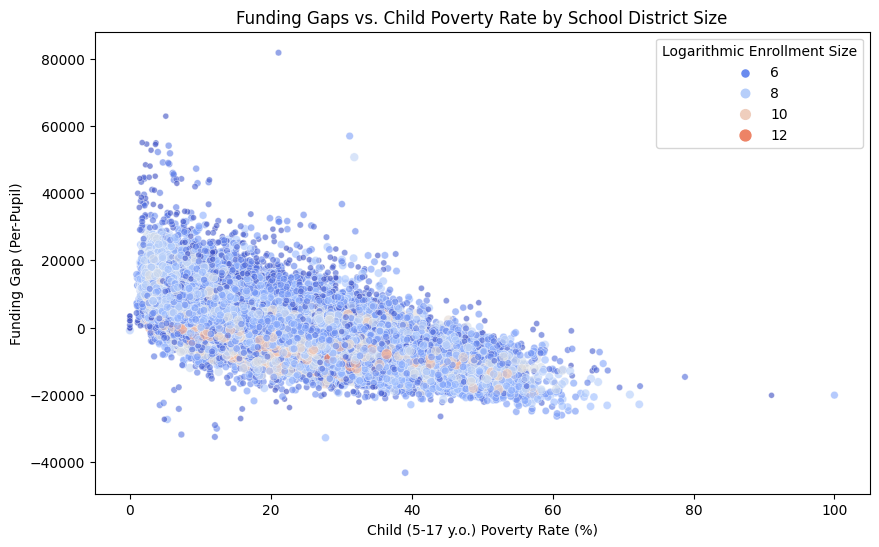

In [26]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=district, x='pov', y='fundinggap', size='log_enroll', hue='log_enroll', palette='coolwarm', alpha=0.6)

plt.title('Funding Gaps vs. Child Poverty Rate by School District Size')
plt.xlabel('Child (5-17 y.o.) Poverty Rate (%)')
plt.ylabel('Funding Gap (Per-Pupil)')
plt.legend(title='Logarithmic Enrollment Size', loc='upper right')
plt.savefig('Analysis_1_1.png', format='png')
plt.show()

A scatterplot is generated with child poverty rate ('pov') on the x-axis and funding gap ('fundinggap') on the y-axis. Additionally, the size of each data point is determined by the 'log_enroll' column, and the color is mapped to the same 'log_enroll' values using the 'coolwarm' color palette. This color variation provides additional information about the logarithmic enrollment size. An alpha value of 0.6 is used for transparency.

A positive funding gap shows that the actual spending (per pupil) is greater than the required (adequate) spending (per pupil), suggesting that the pupils' educational needs are being met (and exceeded in some cases). Whereas a negative funding gap shows that the actual spending (per pupil) is less than the required (adequate) spending (per pupil), suggesting that the pupils' educational needs are not being met.

In [27]:
nineteen_gap = district.copy()
nineteen_gap = nineteen_gap[nineteen_gap['year'] == 2019]
np.sum(nineteen_gap['fundinggap'])

17484155.9920163

A new DataFrame named nineteen_gap is created as a copy of the district DataFrame. Subsequently, this new DataFrame is filtered to include only rows where the 'year' column equals 2019. This step narrows down the data to focus solely on information from the year 2019.

Finally, the code calculates the sum of the 'fundinggap' column within the nineteen_gap DataFrame using np.sum(). This computation provides the total funding gap for the selected year.

The number is 17,484,155.99 (total actual spending - total required spending), which suggests that we have more than enough funding (which is fantastic), but then when you look at the scatterplot, there are multiple schools that are underfunded by over 40,000 dollars. We are severely underfunding some kids and then giving others a huge boost (some upwards of $80,000). Also notice how almost every single large school is underfunded. Adequacy vs. Equity.

In [28]:
correlation_coef, p_value = scipy.stats.pearsonr(district['pov'], district['fundinggap'])
print(f"Correlation Coefficient: {correlation_coef}")
print(f"P-value: {p_value}")

Correlation Coefficient: -0.699899955319263
P-value: 0.0


In [29]:
X = sm.add_constant(district['pov'])  
Y = district['fundinggap']
model = sm.OLS(Y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:             fundinggap   R-squared:                       0.490
Model:                            OLS   Adj. R-squared:                  0.490
Method:                 Least Squares   F-statistic:                 1.300e+05
Date:                Sun, 10 Dec 2023   Prob (F-statistic):               0.00
Time:                        16:04:05   Log-Likelihood:            -1.3294e+06
No. Observations:              135434   AIC:                         2.659e+06
Df Residuals:                  135432   BIC:                         2.659e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       8543.3392     25.041    341.174      0.0

## Analysis 1.2: Assessment of Racial Disparities in Education Opportunities

C:\Users\alext\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\alext\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


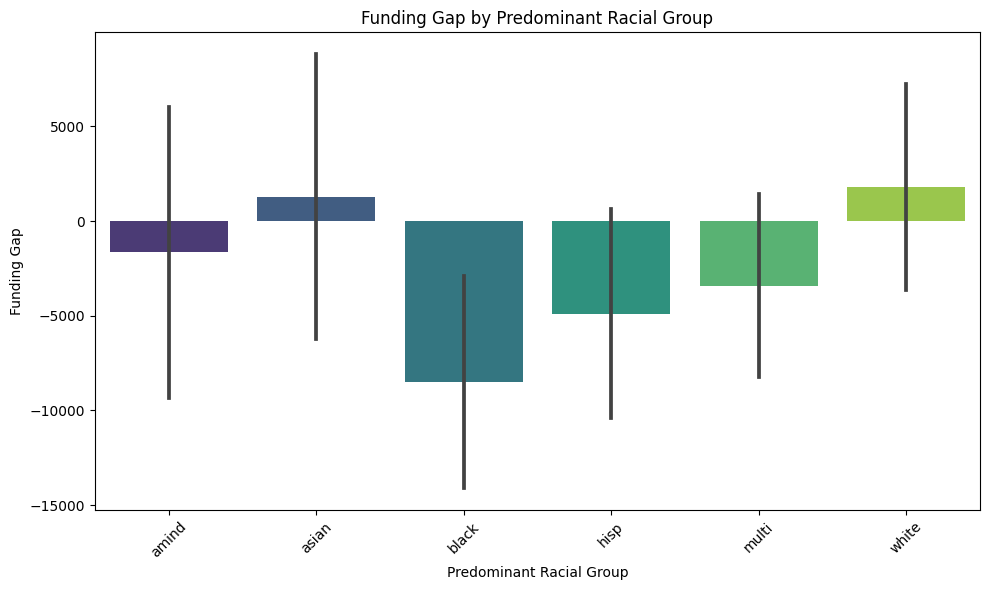

In [30]:
plt.figure(figsize=(10, 6))

sns.barplot(x='predominant_race', y='fundinggap', data=district, order=category_order, errorbar='sd', palette='viridis')

plt.title('Funding Gap by Predominant Racial Group')
plt.xlabel('Predominant Racial Group')
plt.ylabel('Funding Gap')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('Analysis_1_2_1.png', format='png')
plt.show()

A bar plot is generated to visually represent the relationship between the predominant racial group ('predominant_race') and the funding gap ('fundinggap') within the district DataFrame. The figure size of the plot is set, and Seaborn's sns.barplot() function is used to create the plot. On the x-axis, the predominant racial groups are displayed, ordered according to the predefined category_order. The y-axis represents the funding gap, and error bars representing the standard deviation of the data are included. Several plot details are added, such as a title describing the purpose of the visualization, axis labels, and rotated x-axis labels for better readability.

In [31]:
print("Funding Gap Statistics:")
fundinggap_stats = calculate_stats(district, 'fundinggap')

Funding Gap Statistics:
amind: {'mean': -1642.1314220353192, 'p_value': 1.2452474686994425e-44, '95% CI': (-1952.7787699096634, -1331.484074160975)}
asian: {'mean': 1296.0959962624256, 'p_value': 0.04681614845687648, '95% CI': (637.9132673842809, 1954.2787251405703)}
black: {'mean': -8499.171243558714, 'p_value': 0.0, '95% CI': (-8638.224098109482, -8360.118389007946)}
hisp: {'mean': -4879.330534158222, 'p_value': 0.0, '95% CI': (-4973.615189624095, -4785.045878692348)}
multi: {'mean': -3419.9554961728395, 'p_value': 6.482503840526669e-11, '95% CI': (-4472.289206648025, -2367.6217856976536)}
white: {'mean': 1823.1126227051395, 'p_value': 0.0, '95% CI': (1791.36807064603, 1854.857174764249)}


In [32]:
anova_model_funding = ols('fundinggap ~ C(predominant_race)', data=district).fit()
anova_results_funding = sm.stats.anova_lm(anova_model_funding, typ=2)
print("\nANOVA Results for Funding Gap:")
print(anova_results_funding)


ANOVA Results for Funding Gap:
                           sum_sq        df            F  PR(>F)
C(predominant_race)  1.097324e+12       5.0  7211.503995     0.0
Residual             4.121427e+12  135428.0          NaN     NaN


C:\Users\alext\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\alext\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


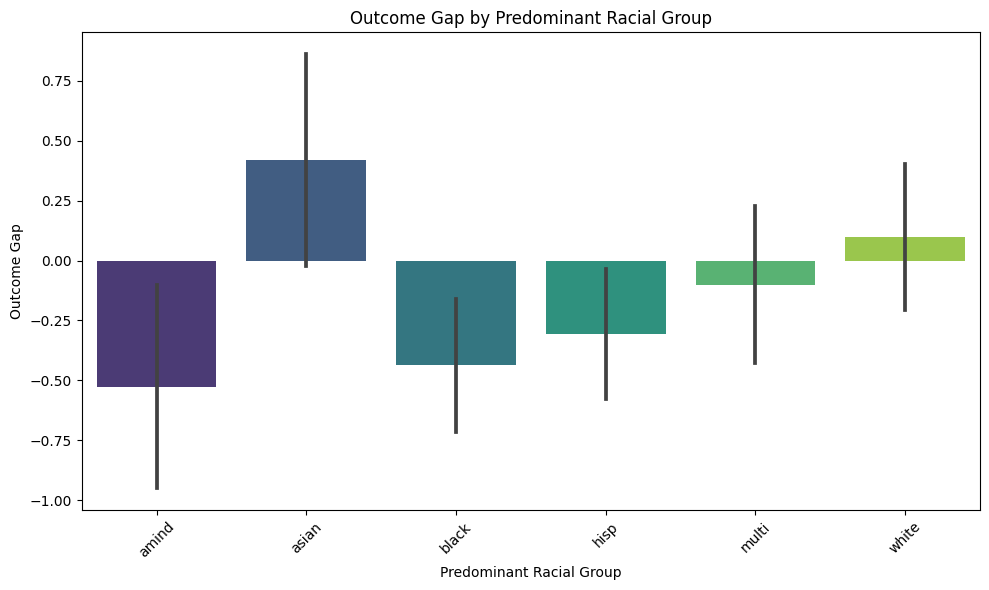

In [33]:
category_order = ['amind', 'asian', 'black', 'hisp', 'multi', 'white']

plt.figure(figsize=(10, 6))

sns.barplot(x='predominant_race', y='outcomegap', data=district, order=category_order, errorbar='sd', palette='viridis')

plt.title('Outcome Gap by Predominant Racial Group')
plt.xlabel('Predominant Racial Group')
plt.ylabel('Outcome Gap')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('Analysis_1_2_2.png', format='png')
plt.show()

A bar plot is generated to visually represent the relationship between the predominant racial group ('predominant_race') and the outcome gap ('outcomegap') within the district DataFrame. The figure size of the plot is set, and Seaborn's sns.barplot() function is used to create the plot. On the x-axis, the predominant racial groups are displayed, ordered according to the predefined category_order. The y-axis represents the outcome gap, and error bars representing the standard deviation of the data are included. Several plot details are added, such as a title describing the purpose of the visualization, axis labels, and rotated x-axis labels for better readability.

In [34]:
print("\nOutcome Gap Statistics:")
outcomegap_stats = calculate_stats(district, 'outcomegap')


Outcome Gap Statistics:
amind: {'mean': -0.5254966815089345, 'p_value': nan, '95% CI': (-0.5469032277540009, -0.504090135263868)}
asian: {'mean': 0.41958172695652174, 'p_value': nan, '95% CI': (0.3744223230693101, 0.46474113084373336)}
black: {'mean': -0.43669254266868274, 'p_value': nan, '95% CI': (-0.44418207270528304, -0.42920301263208244)}
hisp: {'mean': -0.3064453722416229, 'p_value': nan, '95% CI': (-0.31180162402819206, -0.3010891204550537)}
multi: {'mean': -0.09992940403225807, 'p_value': nan, '95% CI': (-0.18127540276528767, -0.018583405299228473)}
white: {'mean': 0.09905275082384737, 'p_value': nan, '95% CI': (0.09700745429819017, 0.10109804734950457)}


In [35]:
anova_model_outcome = ols('outcomegap ~ C(predominant_race)', data=district).fit()
anova_results_outcome = sm.stats.anova_lm(anova_model_outcome, typ=2)
print("\nANOVA Results for Outcome Gap:")
print(anova_results_outcome)


ANOVA Results for Outcome Gap:
                          sum_sq        df            F  PR(>F)
C(predominant_race)  3201.719809       5.0  6946.654566     0.0
Residual             9468.749474  102720.0          NaN     NaN


# Analysis 2: Impact of School Funding on Educational Resources and Outcomes

## Analysis 2.1 Correlation Between School Funding and Class Sizes

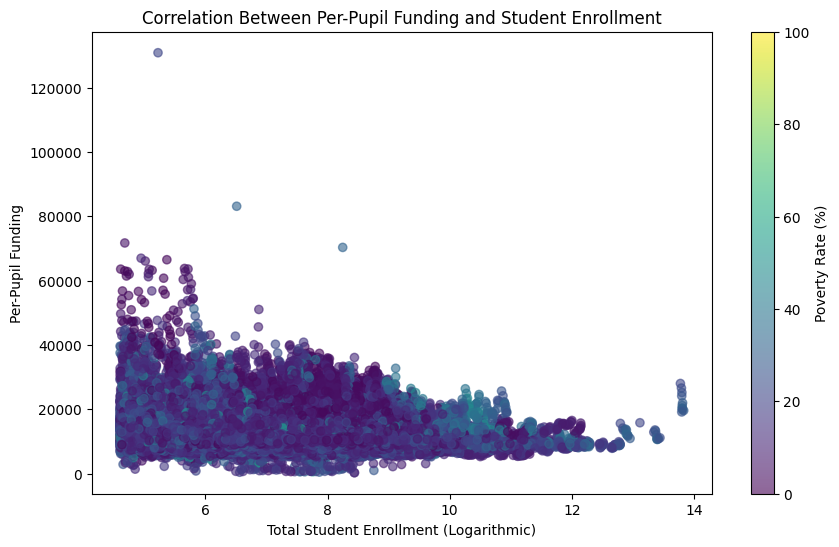

In [36]:
plt.figure(figsize=(10, 6))
plt.scatter(district['log_enroll'], district['ppcstot'], c=district['pov'], cmap='viridis', alpha=0.6)
plt.colorbar(label='Poverty Rate (%)')
plt.title('Correlation Between Per-Pupil Funding and Student Enrollment')
plt.ylabel('Per-Pupil Funding')
plt.xlabel('Total Student Enrollment (Logarithmic)')
plt.savefig('Analysis_2_1.png', format='png')
plt.show()

A scatter plot is generated to visualize the correlation between two key variables: per-pupil funding ('ppcstot') and student enrollment ('log_enroll') in the district DataFrame. The code begins by setting the figure size for the plot, ensuring it is of suitable dimensions for clarity and presentation.

The scatter plot itself is created using plt.scatter(), where 'log_enroll' is plotted on the x-axis, 'ppcstot' on the y-axis, and data points are color-coded based on the 'pov' (poverty rate) column, utilizing the 'viridis' color map. The inclusion of an alpha value of 0.6 imparts a level of transparency to the data points, aiding in visual interpretation.

To provide context to the color-coding, a color bar labeled 'Poverty Rate (%)' is included in the plot using plt.colorbar(). This helps viewers understand the relationship between poverty rates and the color of data points.

In [37]:
correlation_coef, p_value = scipy.stats.pearsonr(district['log_enroll'], district['ppcstot'])
print(f"Correlation Coefficient between log_enroll and ppcstot: {correlation_coef}")
print(f"P-value: {p_value}")

Correlation Coefficient between log_enroll and ppcstot: -0.17547403062395797
P-value: 0.0


In [38]:
X = sm.add_constant(district[['log_enroll', 'pov']])
Y = district['ppcstot']
model = sm.OLS(Y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                ppcstot   R-squared:                       0.072
Model:                            OLS   Adj. R-squared:                  0.072
Method:                 Least Squares   F-statistic:                     5257.
Date:                Sun, 10 Dec 2023   Prob (F-statistic):               0.00
Time:                        16:04:27   Log-Likelihood:            -1.3237e+06
No. Observations:              135434   AIC:                         2.648e+06
Df Residuals:                  135431   BIC:                         2.648e+06
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.786e+04     67.659    263.955      0.0

## Analysis 2.2 Teacher Wage Competitiveness and Educational Outcomes

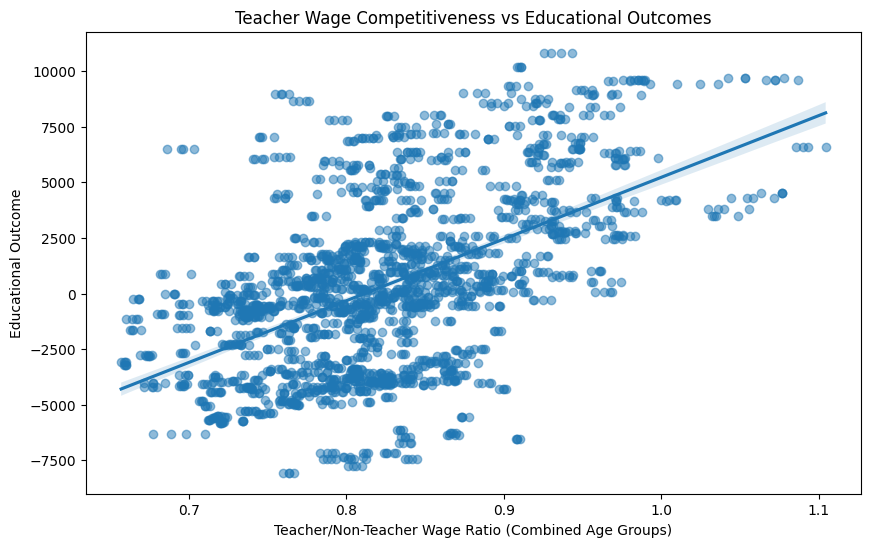

In [39]:
plt.figure(figsize=(10, 6))
sns.regplot(x=sal_parity_combined_clean, y=educational_outcomes_repeated_clean, scatter_kws={'alpha':0.5})

plt.title('Teacher Wage Competitiveness vs Educational Outcomes')
plt.xlabel('Teacher/Non-Teacher Wage Ratio (Combined Age Groups)')
plt.ylabel('Educational Outcome')
plt.savefig('Analysis_2_2.png', format='png')
plt.show()

A regression plot is generated to visually explore the relationship between teacher wage competitiveness and educational outcomes. The figure size is set to ensure an appropriate display, and Seaborn's sns.regplot() function is employed to create the plot.

The x-axis of the plot represents 'sal_parity_combined_clean,' which signifies the teacher/non-teacher wage ratio for combined age groups. On the y-axis, 'educational_outcomes_repeated_clean' represents educational outcomes. The scatter plot includes data points with reduced opacity (alpha=0.5), enhancing the clarity of data distribution.

In [40]:
correlation_coef, p_value = scipy.stats.pearsonr(sal_parity_combined_clean, educational_outcomes_repeated_clean)
print(f"Correlation Coefficient: {correlation_coef}")
print(f"P-value: {p_value}")

Correlation Coefficient: 0.5352239177400158
P-value: 1.932754902811305e-162


In [41]:
X = sm.add_constant(sal_parity_combined_clean)
Y = educational_outcomes_repeated_clean
model = sm.OLS(Y, X).fit()
print(model.summary())

                                  OLS Regression Results                                 
Dep. Variable:     educational_outcomes_repeated   R-squared:                       0.286
Model:                                       OLS   Adj. R-squared:                  0.286
Method:                            Least Squares   F-statistic:                     877.6
Date:                           Sun, 10 Dec 2023   Prob (F-statistic):          1.93e-162
Time:                                   16:04:28   Log-Likelihood:                -20834.
No. Observations:                           2188   AIC:                         4.167e+04
Df Residuals:                               2186   BIC:                         4.168e+04
Df Model:                                      1                                         
Covariance Type:                       nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
------------

# Analysis 3: School Funding Variations Across Regions and Influencing Factors

## Analysis 3.1 Comparative Analysis of Public School Funding Across States

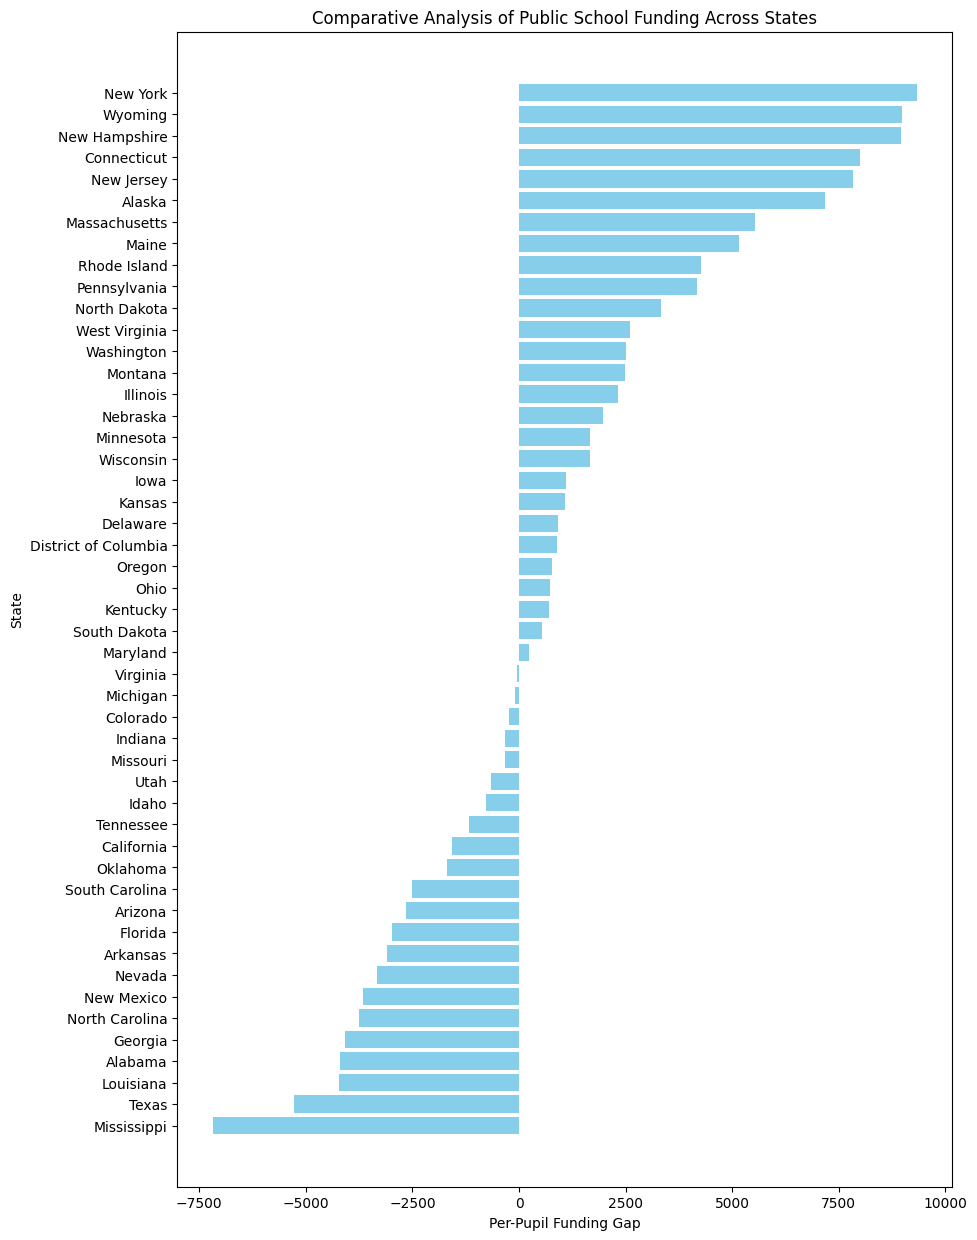

In [42]:
plt.figure(figsize=(10, 15))
plt.barh(state_minus_Hawaii['state_name'], state_minus_Hawaii['necm_fundinggap_state'], color='skyblue')
plt.xlabel('Per-Pupil Funding Gap')
plt.ylabel('State')
plt.title('Comparative Analysis of Public School Funding Across States')
plt.savefig('Analysis_3_1.png', format='png')
plt.show()

A horizontal bar chart is created to conduct a comparative analysis of per-pupil funding gaps across various states. The figure size is adjusted to ensure an appropriate display, and the horizontal bar chart is generated using plt.barh().

On the y-axis, the chart represents the states with 'state_name,' while the x-axis portrays the per-pupil funding gaps using 'necm_fundinggap_state.' The bars are colored 'skyblue' to enhance visual differentiation.

In [43]:
funding_gap_range = state_minus_Hawaii['necm_fundinggap_state'].max() - state_minus_Hawaii['necm_fundinggap_state'].min()
funding_gap_mean = state_minus_Hawaii['necm_fundinggap_state'].mean()
funding_gap_median = state_minus_Hawaii['necm_fundinggap_state'].median()

print(f"Range of Per-Pupil Funding Gap: {funding_gap_range}")
print(f"Mean of Per-Pupil Funding Gap: {funding_gap_mean}")
print(f"Median of Per-Pupil Funding Gap: {funding_gap_median}")

Range of Per-Pupil Funding Gap: 16525.178
Mean of Per-Pupil Funding Gap: 837.5259167346937
Median of Per-Pupil Funding Gap: 709.5794


In [44]:
funding_gap_std = state_minus_Hawaii['necm_fundinggap_state'].std()
print(f"Standard Deviation of Per-Pupil Funding Gap across States: {funding_gap_std}")

Standard Deviation of Per-Pupil Funding Gap across States: 3938.5326210114413


## Analysis 3.2 Role of Fiscal Effort in School Funding

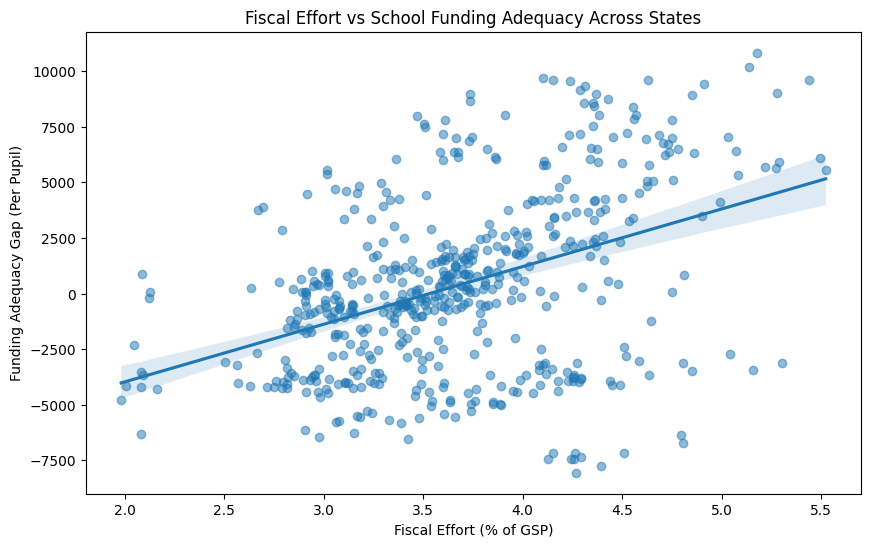

In [45]:
plt.figure(figsize=(10, 6))
sns.regplot(x=cleaned_effort, y=cleaned_state['necm_fundinggap_state'], scatter_kws={'alpha':0.5})
plt.title('Fiscal Effort vs School Funding Adequacy Across States')
plt.xlabel('Fiscal Effort (% of GSP)')
plt.ylabel('Funding Adequacy Gap (Per Pupil)')
plt.savefig('Analysis_3_2.png', format='png')
plt.show()

A regression plot is generated to explore the relationship between fiscal effort, represented as a percentage of Gross State Product (GSP), and school funding adequacy gaps measured as per-pupil funding gaps across various states. The figure size is adjusted to ensure a suitable display, and Seaborn's sns.regplot() function is utilized to create the plot.

On the x-axis, the plot depicts 'cleaned_effort,' which signifies the fiscal effort as a percentage of GSP. The y-axis represents 'cleaned_state['necm_fundinggap_state'],' indicating the funding adequacy gap per pupil. Data points within the plot are displayed with reduced opacity (alpha=0.5) to improve data visibility.

In [46]:
correlation_coef, p_value = scipy.stats.pearsonr(cleaned_effort, cleaned_state['necm_fundinggap_state'])
print(f"Correlation Coefficient: {correlation_coef}")
print(f"P-value: {p_value}")

Correlation Coefficient: 0.4194553581664362
P-value: 1.0129659031738233e-24


In [47]:
X = sm.add_constant(cleaned_effort)
Y = cleaned_state['necm_fundinggap_state']
model = sm.OLS(Y, X).fit()
print(model.summary())

                              OLS Regression Results                             
Dep. Variable:     necm_fundinggap_state   R-squared:                       0.176
Model:                               OLS   Adj. R-squared:                  0.174
Method:                    Least Squares   F-statistic:                     116.4
Date:                   Sun, 10 Dec 2023   Prob (F-statistic):           1.01e-24
Time:                           16:04:31   Log-Likelihood:                -5247.8
No. Observations:                    547   AIC:                         1.050e+04
Df Residuals:                        545   BIC:                         1.051e+04
Df Model:                              1                                         
Covariance Type:               nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -9161.4785 